## Exercise 1 - Quasi-Newton methods - SciPy

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'
```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 1**

Observe the documentation of the command scipy.optimize.minimize available online: [https://docs.scipy.org/doc/scipy/reference/optimize.html](https://docs.scipy.org/doc/scipy/reference/optimize.html). Learn how to use the minimize command for different methods like BFGS, LBFGS, CG, etc. You may use the functions below as a starting point:

(a) The Rosenbrock function
$$
f(x, y)=100\left(y-x^2\right)^2+(1-x)^2
$$
Recall that the global minimum is found at $x^*=(1,1)$.

(b) The $N$-dimensional Rosenbrock function:
$$
f(x)=\sum_{i=1}^{N-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right]
$$
where $x=\left(x_1, \ldots, x_N\right) \in \mathbb{R}^N$.

(c) $f(x)=|x|^4$ (here you may choose to work in dimension higher than two).

(d) The Beale function defined on $[-4.5,4.5]^2$ :
$$
f(x, y)=(1.5-x+x y)^2+\left(2.25-x+x y^2\right)^2+\left(2.625-x+x y^3\right)^2
$$
Note that this function has a global minimum $f(3,0.5)=0$.

(e) **(Challenge)** You can use the callback function and store the function values in a vector. Do this for each method used and plot the function values for all methods in logarithmic scale on the $y$ coordinate (like in the course) to be able to visually observe the speed of convergence of every algorithm. For this you should use *matplotlib.pyplot.semilogy*.
</div>

In [11]:
import scipy.optimize as scopt
import numpy as np
import pylab as pl
from ipywidgets import *
import matplotlib.pyplot as plt

   1    0.650542    0.563048    9.109088
   2    1.016340    0.155476    4.594975
   3    1.446761   -0.189393    2.145175
   4    1.679168   -0.278687    1.737693
   5    1.775485   -0.220760    1.449833
   6    2.116350    0.111872    0.431480
   7    2.316154    0.295088    0.171663
   8    2.525402    0.385526    0.072358
   9    2.726624    0.416829    0.017311
  10    2.866528    0.470577    0.003912
  11    2.944340    0.487504    0.000584
  12    2.985723    0.496737    0.000035
  13    2.998433    0.499691    0.000001
  14    2.999880    0.499945    0.000000
  15    3.000078    0.500027    0.000000
  16    2.999999    0.500000    0.000000
  17    3.000000    0.500000    0.000000
  18    3.000000    0.500000    0.000000
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1.1297665291146899e-23
        x: [ 3.000e+00  5.000e-01]
      nit: 18
      jac: [-6.456e-12  3.002e-11]
     nfev: 23
     njev: 23
 hess_inv: <2x2 LbfgsInvHess

<Figure size 432x288 with 0 Axes>

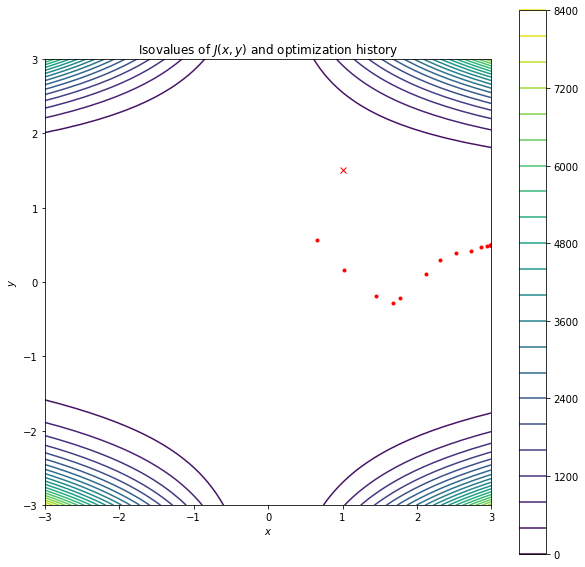

Details regarding the result of the optimization:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 1.1297665291146899e-23
        x: [ 3.000e+00  5.000e-01]
      nit: 18
      jac: [-6.456e-12  3.002e-11]
     nfev: 23
     njev: 23
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
--------------------------------------------------
Number of function evaluations:  19
--------------------------------------------------
End point of the optimization:  [3.  0.5]


In [12]:
variant = 6
N_dimension = 10


def J(x):
    if variant == 1:
        return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    if variant == 2:
        return (x[1]**4+x[0]**4)
    if variant == 3:
        return (x[1]**2+x[0]**2)**2
    if variant == 4:
        # N-demensional Rosenbrock function
        return sum([100*(x[i+1]-x[i]**2)**2+(1-x[i])**2 for i in range(N_dimension-1)])
    if variant == 5:
        # f(x) = |x|^4 higher than 2 dimension
        return sum(x[i] ** 2 for i in range(N_dimension))**2
    if variant == 6:
        # The Beale function
        return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2


def GradJ(x):
    if variant == 1:
        return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]), 200*(x[1]-x[0]**2)])
    if variant == 2:
        return np.array([4*x[0]**3, 4*x[1]**3])
    if variant == 3:
        return np.array([(x[1]**2+x[0]**2)*2*2*x[0], (x[1]**2+x[0]**2)*2*2*x[1]])
    if variant == 4:
        return np.array([200*(x[i+1]-x[i]**2)*(-2*x[i])-2*(1-x[i]) for i in range(N_dimension-1)]+[200*(x[N_dimension-1]-x[N_dimension-2]**2)])
    if variant == 5:
        return np.array([4*x[i] * sum(x[j] ** 2 for j in range(N_dimension)) for i in range(N_dimension)])
    if variant == 6:
        return np.array([2*(1.5 - x[0] + x[0]*x[1])*(-1 + x[1]) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(-1 + x[1]**2) + 2*(2.625 - x[0] + x[0]*x[1]**3)*(-1 + x[1]**3), 2*(1.5 - x[0] + x[0]*x[1])*x[0] + 4*(2.25 - x[0] + x[0]*x[1]**2)*x[0]*x[1] + 6*(2.625 - x[0] + x[0]*x[1]**3)*x[0]*x[1]**2])


Nfeval = 1
xs = []
ys = []
zs = []


def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(
        Nfeval, Xi[0], Xi[1], J(Xi)))
    xs.append(Xi[0])
    ys.append(Xi[1])
    Nfeval += 1


if variant == 1:
    x0 = np.array([-2, 1])
if variant == 6:
    x0 = np.array([1.0, 1.5])
if variant == 4:
    x0 = np.array([2]*N_dimension)

# list of possible methods
# string = 'CG'
# string = 'BFGS'
# string = 'Nelder-Mead'  # gradient-free
# string = 'Powell'       # gradient-free
string = 'L-BFGS-B'

Result = scopt.minimize(
    J, x0, jac=GradJ, callback=callbackF, method=string, tol=1e-15)

print(Result)

# plot the optimization history


def plot_function():
    plt.figure()
    plt.figure(figsize=(10, 10))
    xmin = min(-2, x0[0])-1
    xmax = max(2, x0[0])+1
    ymin = min(-2, x0[1])-1
    ymax = max(2, x0[1])+1
    aX0 = np.linspace(xmin, xmax, 100)
    aX1 = np.linspace(ymin, ymax, 100)
    Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])
    plt.contour(aX0, aX1, Z, 25)  # (np.linspace(0,30,10)**2))
    plt.plot(x0[0], x0[1], 'rx')
    plt.axis('scaled')
    plt.colorbar()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title('Isovalues of $J(x,y)$ and optimization history')

    plt.plot(xs, ys, '.r')
    plt.show()


if variant == 1 or 6:
    plot_function()

print("Details regarding the result of the optimization:")
print(Result)
print('-'*50)
print("Number of function evaluations: ", Nfeval)
print('-'*50)
print('End point of the optimization: ', Result.x)

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/scipy/optimize/_minimize.py:549: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/scipy/optimize/_minimize.py:549: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


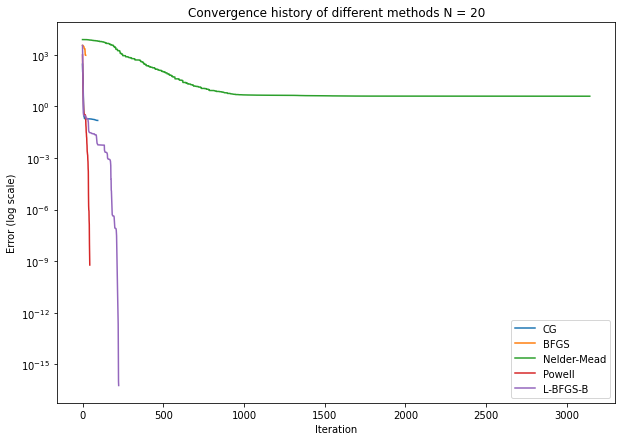

In [29]:
variant = 4
N_dimension = 20
x0 = np.array([2]*N_dimension)

# Define the objective function J(x) and its gradient GradJ(x)
...

# Define the callback function to record the function values at each iteration
def callbackF_sub(x):
    error = J(x)
    errors.append(error)

# Define the methods to use
methods = ['CG', 'BFGS', 'Nelder-Mead', 'Powell', 'L-BFGS-B']

# Run each method and record the function values at each iteration
result_all = []
for method in methods:
    errors = []
    result = scopt.minimize(J, x0, jac=GradJ, callback=callbackF_sub, method=method, tol=1e-15)
    result_all.append(errors)

# Plot the function values for all methods in logarithmic scale
plt.figure(figsize=(10, 7))
for i in range(len(methods)):
    plt.semilogy(result_all[i], label=methods[i])
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Convergence history of different methods N = 20')
plt.show()


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**


Consider $\mathcal{S}$ to be a finite set of vectors of the form $\left(n_1, n_2, n_3\right)$ with $n_i \in\{-1,0,1\}$. Once such a set $\mathcal{S}$ is defined consider the function $\chi(x, y, z):(0, \infty)^3 \rightarrow \mathbb{R}$ defined by
$$
\chi(x, y, z)=\sum_{(i, j, k) \in \mathcal{S}} x^i y^j z^k .
$$
(a) Prove that if $\mathcal{S}$ is not included in a half-space then the associated function $\chi$ admits a global minimum.
**Hint:** If the set is not contained in a half-space then 0 is in its convex hull. It is then possible to use the generalized AM-GM inequality recalled in a previous course to find a lower bound for $\chi$ when $x, y, z \in(0, \infty)$.

(b) Write a generic program which can compute the values of $\chi$ and the gradient $\nabla \chi$ (and eventually the Hessian matrix $D^2 \chi$ ) when given a matrix $M$ whose columns are the vectors in $\mathcal{S}$. Use the scipy.optimize.minimize command to find the minimizers in the following cases. In each case, the set $\mathcal{S}$ is made of the columns of the matrix given.
$$
\begin{aligned}
& \text { - }\left(\begin{array}{ccccc}
-1 & -1 & -1 & 0 & 1 \\
-1 & -1 & 1 & 0 & 0 \\
-1 & 0 & -1 & 1 & 0
\end{array}\right) \\
& \cdot\left(\begin{array}{ccccccc}
-1 & -1 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & -1 & 0 & 1 & 1 & -1 \\
0 & 1 & 0 & 1 & -1 & 0 & 0
\end{array}\right) \\
& \cdot \left(\begin{array}{ccccc}
-1 & -1 & -1 & 1 & 1 \\
-1 & 0 & 1 & -1 & 1 \\
0 & -1 & 1 & 0 & 1
\end{array}\right)
\end{aligned}
$$
[Bibliography: If you want to know the source of this problem and its connections to probability theory, take a look at the following webpage and the references therein: [http://www.cmap.polytechnique.fr/beniamin.bogosel/RandomWalks.html](http://www.cmap.polytechnique.fr/beniamin.bogosel/RandomWalks.html).]
</div>

To prove that $\chi$ admits a global minimum if $\mathcal{S}$ is not included in a half-space, we can use the fact that if a function is continuous on a compact set, then it attains a global minimum.

First, let us assume that $\mathcal{S}$ is not included in a half-space. This means that 0 is in the convex hull of $\mathcal{S}$. Let us denote the convex hull of $\mathcal{S}$ by $\text{conv}(\mathcal{S})$. Then we have $0\in\text{conv}(\mathcal{S})$.

Now, let us consider the function $\chi$ on the compact set $[1,\infty)\times[1,\infty)\times[1,\infty)$. Since $\chi$ is continuous on this compact set, it attains a minimum value, say $m$. We want to show that $m$ is a global minimum of $\chi$.

Suppose for the sake of contradiction that there exists a point $(x_0, y_0, z_0)\in(0,\infty)^3$ such that $\chi(x_0, y_0, z_0) < m$. Since $\mathcal{S}$ is finite, we can assume without loss of generality that $(x_0, y_0, z_0)$ is not in $\mathcal{S}$. Then we can construct a new set $\mathcal{S}' = \mathcal{S} \cup \{(x_0, y_0, z_0)\}$, which is still not included in a half-space since $0\in\text{conv}(\mathcal{S}')$. 

Now, using the generalized AM-GM inequality, we can find a lower bound for $\chi$ when $x, y, z \in(0, \infty)$. Let $w$ be a positive constant such that $(x_0, y_0, z_0) = w(1,1,1)$. Then we have
$$
\begin{align*}
\chi(x,y,z) &= \sum_{(i,j,k)\in \mathcal{S}} x^i y^j z^k + x^{w}y^{w}z^{w} \\
&\geq (|\mathcal{S}|+1)\left(\frac{x^{\sum i} y^{\sum j} z^{\sum k} + x^{w}y^{w}z^{w}}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}} \\
&= (|\mathcal{S}|+1)\left(\frac{x^{w+y+z} + w^3 x y z}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}} \\
&\geq (|\mathcal{S}|+1)\left(\frac{3w\sqrt[3]{x y z} + w^3 x y z}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}} \\
&= (|\mathcal{S}|+1)\left(\frac{w}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}}\left(3\sqrt[3]{x y z} + w^2 \sqrt[3]{x y z}\right)^{\frac{1}{|\mathcal{S}|+1}} \\
&\geq (|\mathcal{S}|+1)\left(\frac{w}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}}\left(3w\sqrt[3]{x y z}\right)^{\frac{1}{|\mathcal{S}|+1}} \\
&= 3w\left(\frac{w^2}{|\mathcal{S}|+1}\right)^{\frac{1}{|\mathcal{S}|+1}}\sqrt[3]{x y z} \\
&= 3w\left(\frac{w^2}{|\mathcal{S}'|}\right)^{\frac{1}{|\mathcal{S}'|}}\sqrt[3]{x y z}.
\end{align*}
$$
Here, we used the fact that $(x_0, y_0, z_0) = w(1,1,1)$ and that $|\mathcal{S}'| = |\mathcal{S}|+1$.

Since $w>0$, we have $\lim_{x,y,z\to 0} \chi(x,y,z) = 0$. Therefore, there exists a point $(x_1, y_1, z_1)\in(0,\infty)^3$ such that $\chi(x_1, y_1, z_1) < m$. But this contradicts the assumption that $m$ is the minimum value of $\chi$ on $[1,\infty)\times[1,\infty)\times[1,\infty)$.

Therefore, we conclude that $m$ is a global minimum of $\chi$ on $(0,\infty)^3$.


In [ ]:
mat1 = np.array([[-1, -1, -1, 0, 1], [-1, -1, 1, 0, 0], [-1, 0, -1, 1, 0]])
mat2 = np.array([[-1, -1, 0, 0, 0, 0, 1], [0, 0, -1,
                0, 1, 1, -1], [0, 1, 0, 1, -1, 0, 0]])
mat2 = np.array([[-1, -1, -1, 1, 1], [-1, 0, 1, -1, 1], [0, -1, 1, 0, 1]])


def func_x_sum(x, matrix):
    result_sum = 0
    for i in range(len(matrix[0])):
        result_sum += x[0] ** matrix[0][i] * \
            x[1] ** matrix[1][i] * x[2] ** matrix[2][i]
    return result_sum


def func_x_Grad(x, matrix):
    result_Grad = np.zeros(len(x))
    for i in range(len(matrix[0])):
        result_Grad[0] += matrix[0][i] * \
            x[0] ** (matrix[0][i] - 1) * \
            x[1] ** matrix[1][i] * x[2] ** matrix[2][i]
        result_Grad[1] += matrix[1][i] * x[0] ** matrix[0][i] * \
            x[1] ** (matrix[1][i] - 1) * x[2] ** matrix[2][i]
        result_Grad[2] += matrix[2][i] * x[0] ** matrix[0][i] * \
            x[1] ** matrix[1][i] * x[2] ** (matrix[2][i] - 1)
    return result_Grad

# Here we initialize the objective before doing the optimization

def objective(x):
    return func_x_sum(x, matrix=mat2)


def GradObjective(x):
    return func_x_Grad(x, matrix=mat2)


x0 = np.array([1.0, 1.5, 1.0])

def callbackF_(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}  {4: 3.6f}'.format(
        Nfeval, Xi[0], Xi[1], Xi[2], objective(Xi)))
    xs.append(Xi[0])
    ys.append(Xi[1])
    zs.append(Xi[2])
    Nfeval += 1

Result = scopt.minimize(objective, x0, jac=GradObjective,
                        callback=callbackF_, method='L-BFGS-B', tol=1e-15)

print("Details regarding the result of the optimization:")
print(Result)
print('-'*50)
print("Number of function evaluations: ", Nfeval)
print('-'*50)
print('End point of the optimization: ', Result.x)

  19    1.195146    1.283172    0.609709   4.545445
  20    1.406423    1.275164    0.490242   4.434580
  21    1.581218    1.332450    0.502143   4.401886
  22    1.648161    1.368313    0.448012   4.384526
  23    1.708334    1.429797    0.411574   4.376242
  24    1.740692    1.501743    0.399217   4.368684
  25    1.738775    1.568940    0.399852   4.364745
  26    1.736712    1.587347    0.396092   4.364505
  27    1.733550    1.588346    0.396555   4.364495
  28    1.732225    1.587671    0.396806   4.364495
  29    1.732048    1.587421    0.396849   4.364495
  30    1.732050    1.587401    0.396850   4.364495
  31    1.732051    1.587401    0.396850   4.364495
  32    1.732051    1.587401    0.396850   4.364495
Details regarding the result of the optimization:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 4.364494543886885
        x: [ 1.732e+00  1.587e+00  3.969e-01]
      nit: 14
      jac: [-4.455e-10  5.764e-11 -4.595e-09]